In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression



In [2]:
## Data Import and Manipulation
info_style_numeric = pd.read_csv("ittf_player_info_style_numeric.csv")
print(info_style_numeric.columns)
# Clean the "Name" column by removing all non-alphabetic characters
info_style_numeric['Name'] = info_style_numeric['Name'].str.replace(r'[^a-zA-Z\s-]', '', regex=True)
# Transform the df into a dict, of which the value is a list containing the numeric values of four styles
styles_dict = info_style_numeric.set_index('Name')[['Playing_hand_numeric', 'Playing_style_numeric', 'Grip_numeric', 'Style_commonness','Assoc']].apply(lambda row: row.tolist(), axis=1).to_dict()
ranking_not_aggregated = pd.read_csv("ittf_ranking_50.csv")
# Apply styles_dict to all cases of all columns of the ranking_50 df. 
# The result is a tuple of the player name and a list of style infos.
# For those players who are not in the styles_dict, the value is 99.
ranking_styles = ranking_not_aggregated.map(lambda x: (x, styles_dict.get(x, 99)))
# Rename column "Unnamed: 0" to "ranking"
ranking_styles = ranking_styles.rename(columns={"Unnamed: 0": "Ranking"})
# Replace tuples in the "ranking" column with their first element (to avoid adding 99 to this column)
ranking_styles['Ranking'] = ranking_styles['Ranking'].apply(lambda x: x[0] if isinstance(x, tuple) else x)
# Apply cleaning only to columns *other than* 'Ranking'
ranking_not_aggregated.loc[:, ranking_not_aggregated.columns != 'Ranking'] = (
    ranking_not_aggregated.loc[:, ranking_not_aggregated.columns != 'Ranking']
    .applymap(lambda x: re.sub(r'[^a-zA-Z\s-]', '', x) if isinstance(x, str) else x)
)
# Display result
print(ranking_styles.head())

Index(['Player ID', 'Name', 'Assoc', 'Gender', 'Birth year', 'Activity',
       'Playing hand', 'Playing style', 'Grip', 'Playing_hand_numeric',
       'Playing_style_numeric', 'Grip_numeric', 'Style_commonness'],
      dtype='object')
  Ranking                                    2001  \
0  Rank 1         (WANG Liqin, [0, 0, 0, 0, CHN])   
1  Rank 2  (SAMSONOV Vladimir, [0, 0, 0, 0, BLR])   
2  Rank 3             (MA Lin, [0, 0, 1, 1, CHN])   
3  Rank 4       (LIU Guozheng, [0, 0, 0, 0, CHN])   
4  Rank 5       (KONG Linghui, [0, 0, 0, 0, CHN])   

                                   2002  \
0           (MA Lin, [0, 0, 1, 1, CHN])   
1        (BOLL Timo, [1, 0, 0, 1, GER])   
2       (WANG Liqin, [0, 0, 0, 0, CHN])   
3  (SCHLAGER Werner, [0, 0, 0, 0, AUT])   
4     (KONG Linghui, [0, 0, 0, 0, CHN])   

                                     2003                               2004  \
0             (MA Lin, [0, 0, 1, 1, CHN])      (WANG Hao, [0, 0, 1, 1, CHN])   
1         (WANG Liqin, [0,

/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/1790396259.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: re.sub(r'[^a-zA-Z\s-]', '', x) if isinstance(x, str) else x)


In [18]:
allcountry={}
for col in ranking_styles.columns[1:]:
    countrys_this_year=ranking_styles[col].apply(lambda x:x[-1][-1] if isinstance(x[-1],list) else None)
    country_counts=countrys_this_year.value_counts()
    allcountry[col]=country_counts
print(allcountry)

{'2001': 2001
CHN    7
KOR    4
FRA    4
TPE    2
GER    2
AUT    2
NED    2
SWE    2
GRE    1
BLR    1
BEL    1
CRO    1
CZE    1
HKG    1
ESP    1
DEN    1
Name: count, dtype: int64, '2002': 2002
CHN    9
FRA    3
KOR    3
SWE    3
NED    2
GER    2
AUT    2
TPE    2
HKG    2
BEL    1
GRE    1
BLR    1
CRO    1
DEN    1
RUS    1
CZE    1
Name: count, dtype: int64, '2003': 2003
CHN    10
KOR     4
SWE     3
HKG     3
TPE     2
FRA     2
NED     2
AUT     2
GER     2
BEL     1
RUS     1
BLR     1
GRE     1
DEN     1
CZE     1
CRO     1
ROU     1
Name: count, dtype: int64, '2004': 2004
CHN    9
KOR    4
GER    3
AUT    3
SWE    3
TPE    2
RUS    2
FRA    2
HKG    2
BLR    1
DEN    1
BEL    1
GRE    1
NED    1
CZE    1
CRO    1
ROU    1
SRB    1
Name: count, dtype: int64, '2005': 2005
CHN    8
GER    4
KOR    4
SWE    3
FRA    2
TPE    2
CRO    2
AUT    2
NED    2
HKG    2
BLR    1
BEL    1
RUS    1
DEN    1
GRE    1
ROU    1
SGP    1
CZE    1
SRB    1
ESP    1
Name: count, dtype: int64,

['CHN', 'KOR', 'GER', 'JPN', 'SWE', 'AUT', 'HKG', 'TPE', 'FRA', 'CRO']


<Axes: xlabel='year', ylabel='count'>

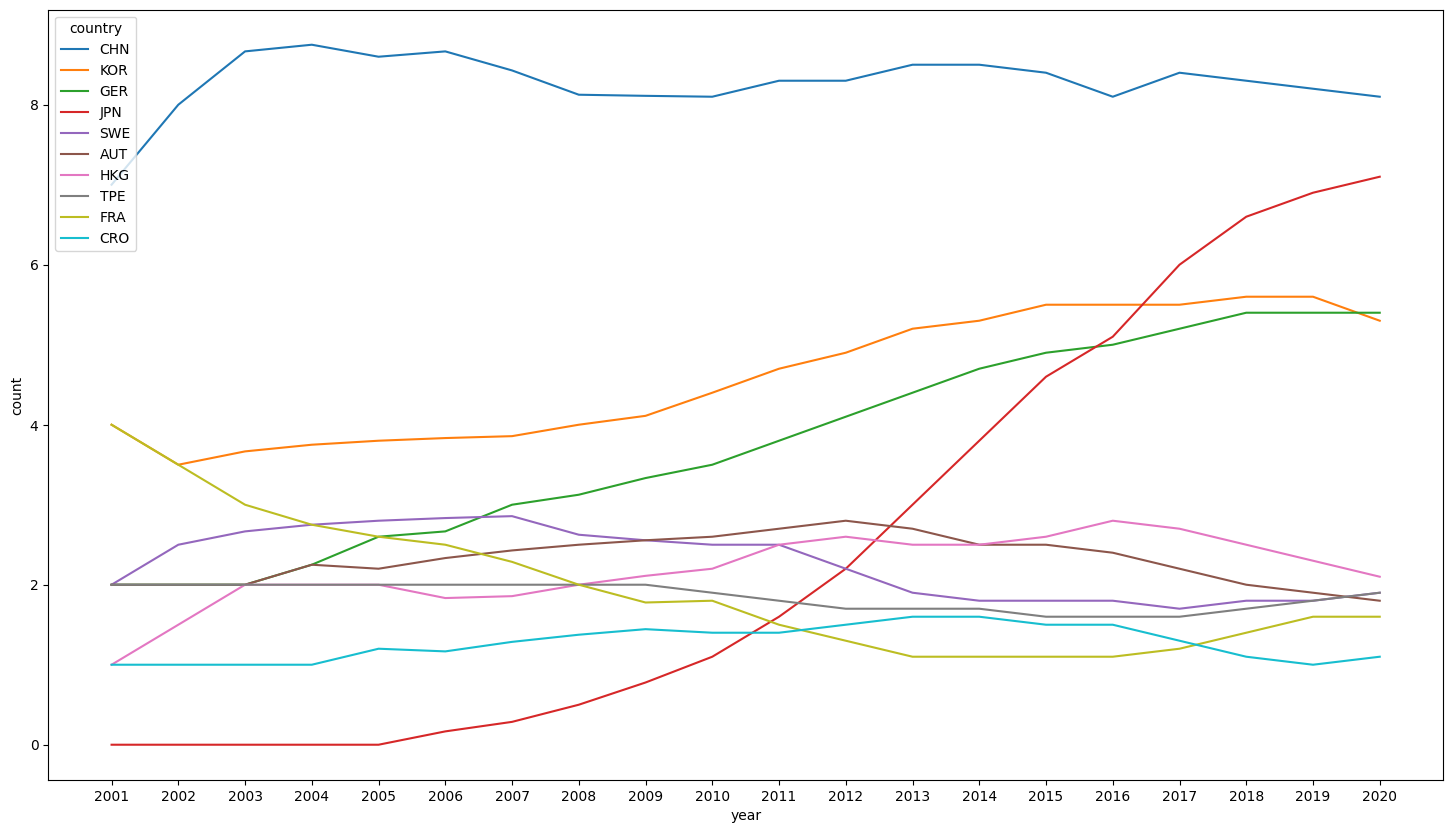

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,10))
df_country_year = pd.DataFrame(allcountry).fillna(0).astype(int).T
country_top10=df_country_year.sum().sort_values(ascending=False).head(10).index.to_list()
print(country_top10)
df_top10=df_country_year[country_top10]
# 假设你还在用 df_top10
df_top10_smooth = df_top10.rolling(window=10, min_periods=1).mean()
df_top10_smooth['year'] = df_top10_smooth.index
df_melted_smooth = df_top10_smooth.melt(id_vars='year',var_name='country', value_name='count')

# 再画图
sns.lineplot(data=df_melted_smooth, x='year',y='count',hue='country')


In [4]:
## First Round of Ratio Calculation and Visualization (Without Applying Varied Weights)

# The function "extract_and_count" is used to extract the numeric value of each of the four styles from the tuple in each cell
# before counting unique values in the df.
def extract_and_count(dataframe, list_index):    
    extracted_values = dataframe.drop(columns=["Ranking"]).map(
        lambda x: x[1][list_index] if isinstance(x[1], list) else x[1]
    )
    return extracted_values.apply(pd.Series.value_counts)

# Applying the function to extract different indices
playinghand_numeric_value = extract_and_count(ranking_styles, 0)
playingstyle_numeric_value = extract_and_count(ranking_styles, 1)
grip_numeric_value = extract_and_count(ranking_styles, 2)
stylecommonness_numeric_value = extract_and_count(ranking_styles, 3)
#print(ranking_styles['2001'])
# Display the results
print("Playing Hand Numeric Value:\n", playinghand_numeric_value)
print("Playing Style Numeric Value:\n", playingstyle_numeric_value)
print("Grip Numeric Value:\n", grip_numeric_value)
print("Style Commonness Numeric Value:\n", stylecommonness_numeric_value)


Playing Hand Numeric Value:
     2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0     21    25    26    29    27    29    29    30    32    34    34    32   
1     12    10    12    10    14    13    14    13    13    12    14    16   
99    17    15    12    11     9     8     7     7     5     4     2     2   

    2013  2014  2015  2016  2017  2018  2019  2020  
0     34    34    37    35  36.0  34.0  33.0  35.0  
1     15    15    12    14  14.0  16.0  17.0  15.0  
99     1     1     1     1   NaN   NaN   NaN   NaN  
Playing Style Numeric Value:
     2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0     28    31    34    36    39    40    41    40    42    43    45    45   
1      5     4     4     3     2     2     2     3     3     3     3     3   
99    17    15    12    11     9     8     7     7     5     4     2     2   

    2013  2014  2015  2016  2017  2018  2019  2020  
0     46    46    46    47  48.0  48.0  47.0  47.0

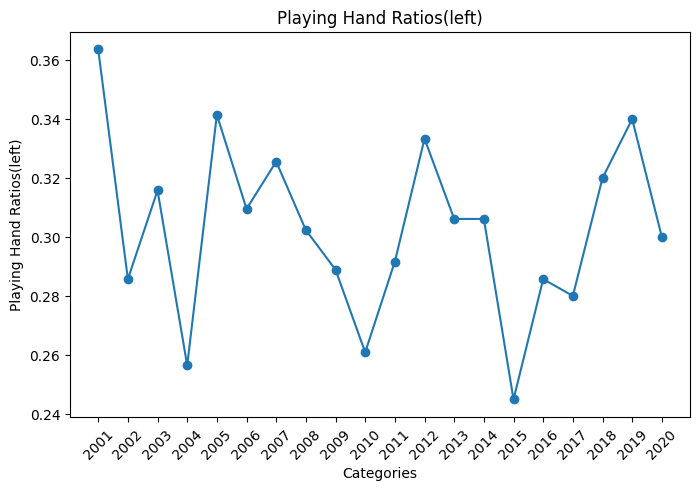

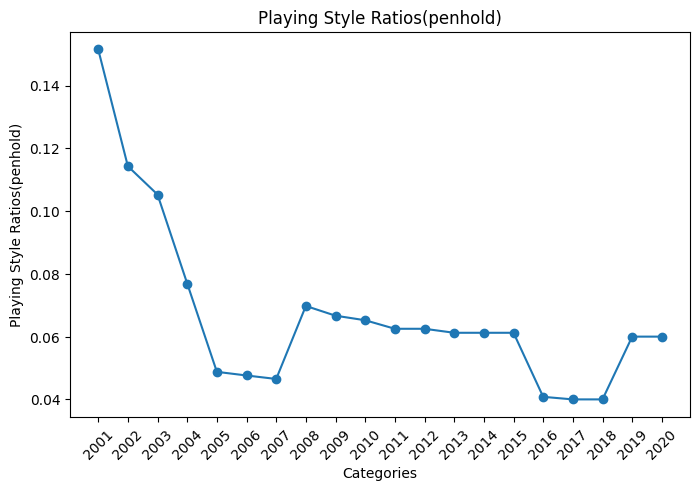

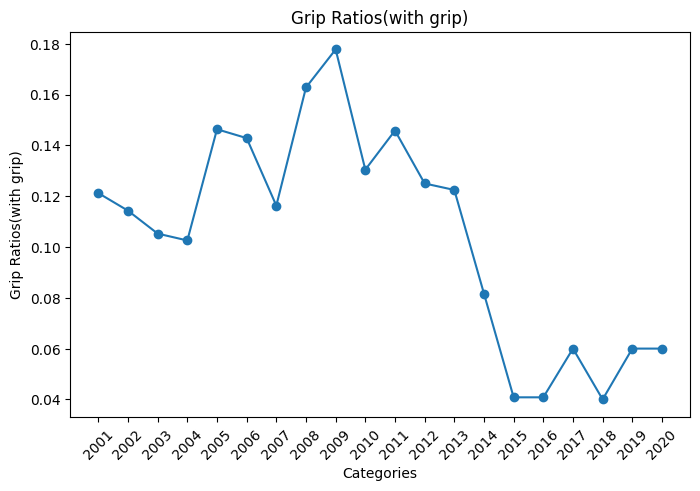

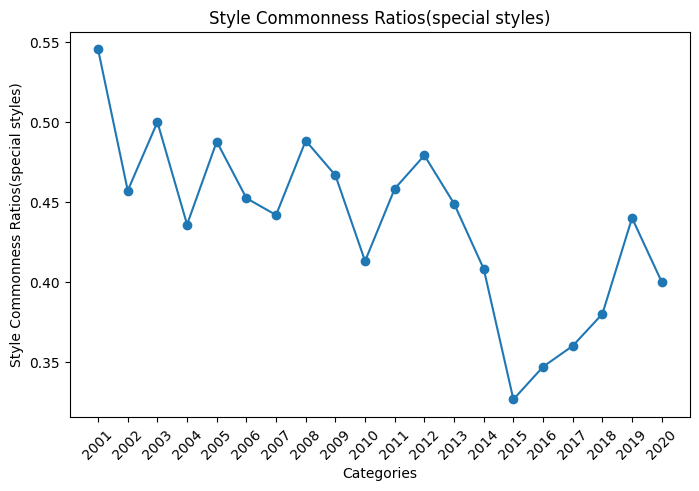

In [5]:
def calculate_and_visualize_ratios(dataframe, title):
    
    # Step 1: Compute Ratios
    ratios = {}
    for column in dataframe.columns:
        ratio = dataframe[column][1] / (dataframe[column][1] + dataframe[column][0])
        #print((dataframe[column][1] + dataframe[column][0]))
        ratios[column] = ratio

    # Step 2: Convert dictionary to two separate lists
    x = list(ratios.keys())  # Categories (e.g., Years)
    y = list(ratios.values())  # Corresponding Ratios

    # Step 3: Create the Line Plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o')  # Adding markers to highlight data points

    # Add labels and title
    plt.xlabel('Categories')  # Generalized since it can be years, styles, etc.
    plt.ylabel(title)  # Dynamic y-label based on input title
    plt.title(title)

    # Ensure all categories are displayed on the x-axis
    plt.xticks(x, rotation=45)

    # Display the plot
    plt.show()
    
    
list_to_plot = [playinghand_numeric_value, playingstyle_numeric_value, grip_numeric_value, stylecommonness_numeric_value]
calculate_and_visualize_ratios(list_to_plot[0], "Playing Hand Ratios(left)")
calculate_and_visualize_ratios(list_to_plot[1], "Playing Style Ratios(penhold)")
calculate_and_visualize_ratios(list_to_plot[2], "Grip Ratios(with grip)")
calculate_and_visualize_ratios(list_to_plot[3], "Style Commonness Ratios(special styles)")



In [6]:
## Applying Varied Weights to Players of Different Rankings  

# Sample data (assuming ranking_styles is already defined)
data = ranking_styles.copy()  # Create a copy to modify without altering the original

# Define the weight function
def compute_weight(index, max_index):
    # if index<=10:
    #     return 0.1
    # else:
    #     return 1
    return 1
    #return 2 - (index / max_index)

# Calculate the maximum index
max_index = len(data) - 1

# Create a new DataFrame to store the weighted values
weighted_df = data.copy()

# Iterate over each year (column) in the DataFrame
for year in data.columns:
    # Iterate over each player's ranking (row index) and value
    for idx, value in enumerate(data[year]):
        # Apply weight only if the value is a tuple and contains a list
        if isinstance(value, tuple) and isinstance(value[1], list):
            weight = compute_weight(idx, max_index)
            # Multiply the entire list by the weight
            modified_tuple = (value[0], [(element+1) * weight for element in value[1]])
            weighted_df.at[idx, year] = modified_tuple  # Store the modified tuple

# Display DataFrame in Jupyter Notebook or VS Code (if using interactive mode)
from IPython.display import display  
#display(weighted_df)  # Show DataFrame directly in the output

# Export the wieghted DataFrame to a CSV file
weighted_df.to_csv("styles_weighted_by_rankings.csv", index=False)


In [7]:
## Calculating the Weighted Ratios to See the Evolution of Styles

# Sample DataFrame (Assuming ranking_styles exists)
data = ranking_styles.copy()  # Create a copy to modify without altering the original

# Initialize dictionaries to store the sum and count for each component (0,1,2,3)
component_sums = {i: {} for i in range(4)}  # Store total sums for four components
component_counts = {i: {} for i in range(4)}  # Store valid row counts for each component

# Iterate over each column (year)
for column in data.columns:
    # Initialize total sum and valid count for each component
    total_sums = [0] * 4  # [Sum for list[0], Sum for list[1], Sum for list[2], Sum for list[3]]
    valid_counts = [0] * 4  # Count valid rows that contain a list as second element

    # Iterate over each cell in the column
    for value in data[column]:
        if isinstance(value, tuple) and len(value) > 1 and isinstance(value[1], list):
            for i in range(min(4, len(value[1]))):  # Ensure we do not exceed list length
                total_sums[i] += value[1][i]  # Sum up values for each list element
                valid_counts[i] += 1  # Count how many valid entries exist

    # Store the results for each component
    for i in range(4):
        component_sums[i][column] = total_sums[i] / valid_counts[i] if valid_counts[i] > 0 else 0

# Convert results to a single DataFrame
styles_evolution_weighted_df = pd.DataFrame({
    "Year": list(component_sums[0].keys()),
    "Playing_Hand_Ratio": list(component_sums[0].values()),
    "Playing_Style_Ratio": list(component_sums[1].values()),
    "Grip_Ratio": list(component_sums[2].values()),
    "Style_Commonness_Ratio": list(component_sums[3].values()),
}).set_index("Year")

# Remove the "Ranking" row from styles_evolution_weighted_df
styles_evolution_weighted_df = styles_evolution_weighted_df.drop("Ranking", errors="ignore")

# Esport the final DataFrame to a CSV file
styles_evolution_weighted_df.to_csv("styles_evolution_weighted.csv")

# Display the final DataFrame
styles_evolution_weighted_df.head()


,Playing_Hand_Ratio,Playing_Style_Ratio,Grip_Ratio,Style_Commonness_Ratio
Year,,,,
2001,0.363636,0.151515,0.121212,0.545455
2002,0.285714,0.114286,0.114286,0.457143
2003,0.315789,0.105263,0.105263,0.500000
2004,0.256410,0.076923,0.102564,0.435897
2005,0.341463,0.048780,0.146341,0.487805


Coefficients: [0.79987041 0.75213615 0.75038113]
Intercept: 0.06543059268475471


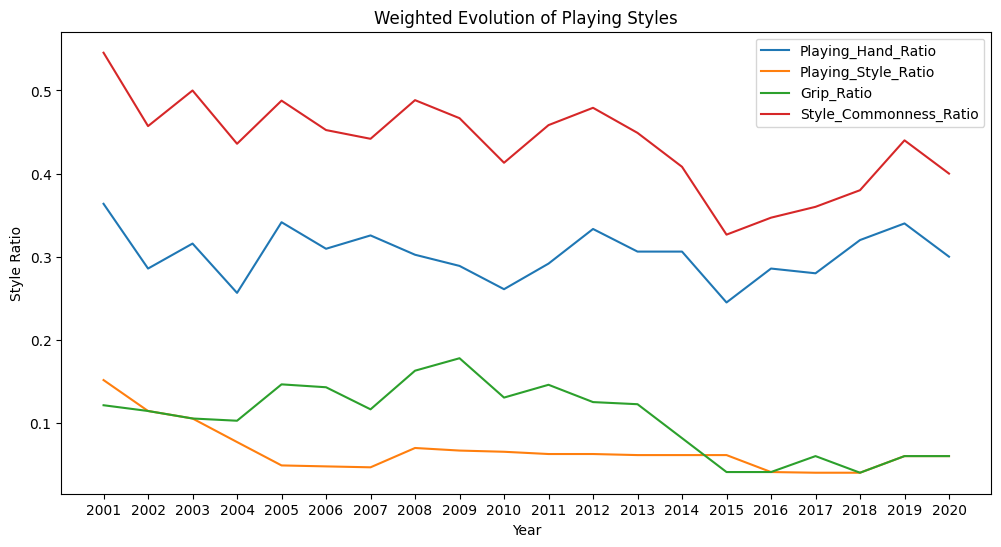

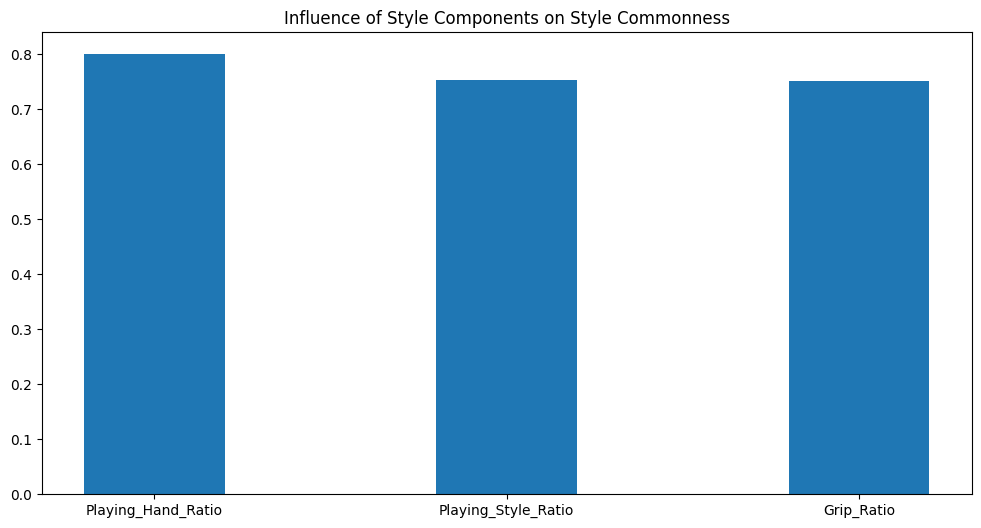

In [8]:
# Generate a line plot for each component style ratio as well as the commonness ratio

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each style component
for column in styles_evolution_weighted_df.columns:
    ax.plot(styles_evolution_weighted_df.index, styles_evolution_weighted_df[column], label=column)
    
# Set the title and labels
ax.set_title("Weighted Evolution of Playing Styles")
ax.set_xlabel("Year")
ax.set_ylabel("Style Ratio")

# Set the legend
ax.legend()




## Influence of Each Dimensions to the Evolution of the Style Commonness (Multiple Linear Regression)

x1 = styles_evolution_weighted_df['Playing_Hand_Ratio'] 
x2 = styles_evolution_weighted_df['Playing_Style_Ratio']
x3 = styles_evolution_weighted_df['Grip_Ratio']
X = [x1, x2, x3]    
X_T = np.transpose(X)
y = styles_evolution_weighted_df['Style_Commonness_Ratio']

# Initialize and train the model
model = LinearRegression()
# Fit the model
model.fit(X_T, y)

# Display the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Visualization

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.4

# Plot the influence of each component
ax.bar(styles_evolution_weighted_df.columns[:3], model.coef_[:3], width=bar_width)

# Set the title and labels
ax.set_title("Influence of Style Components on Style Commonness")

# Display the plot
plt.show()

In [43]:
ranking_not_aggregated = pd.read_csv("ittf_ranking_50.csv")
info_style_numeric = pd.read_csv("ittf_player_info_style_numeric.csv")
info_style_numeric.head()

,Player ID,Name,Assoc,Gender,Birth year,Activity,Playing hand,Playing style,Grip,Playing_hand_numeric,Playing_style_numeric,Grip_numeric,Style_commonness
0,145778,AALTONEN Gabriela,SWE,Female,2009.0,Active,Right-handed,Attacker,Shakehand,0,0,0,0
1,110737,AARAS Pal,NOR,Male,1992.0,Inactive,Right-handed,Attacker,Shakehand,0,0,0,0
2,145022,AARRAD Wahiba,MAR,Female,2003.0,Active,Right-handed,Attacker,Shakehand,0,0,0,0
3,116168,AASEBO Anna,NOR,Female,1995.0,Active,Right-handed,Attacker,Shakehand,0,0,0,0
4,110761,AASEBO Marte,NOR,Female,1990.0,Active,Right-handed,Attacker,Shakehand,0,0,0,0


In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def scrape_ittf_win_rates(output_csv="ittf_win_rates_full.csv"):
    # 1. 配置无头 Chrome
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)

    # 2. 打开页面并等待首屏加载
    url = "https://results.ittf.link/index.php/statistics/win-rate-senior-events/list/88"
    driver.get(url)
    wait = WebDriverWait(driver, 10)
    time.sleep(2)

    all_data = []
    page = 1

    while True:
        print(f"📄 正在爬第 {page} 页…")
        # 等待表格行渲染
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody tr")))
        time.sleep(1)

        # 3. 提取本页数据（跳过列数不足的行）
        rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
        page_data = []
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) < 6:
                continue
            name    = cols[0].text.strip()      # Name
            winrate = cols[4].text.strip().rstrip('%')  # Win Rate % 在第5列 :contentReference[oaicite:1]{index=1}
            page_data.append((name, winrate))

        # 如果本页一条有效都没，说明已过末页
        if not page_data:
            print("⚠️ 本页无有效数据，结束爬取")
            break
        all_data.extend(page_data)

        # 4. 翻页：先拿到 <a>，再到父 <li> 判断 disabled
        try:
            next_a = driver.find_element(By.LINK_TEXT, "Next")
            next_li = next_a.find_element(By.XPATH, "./..")
            if "disabled" in next_li.get_attribute("class"):
                print("✅ 已到最后一页")
                break

            # 滚动到按钮可视再点击
            driver.execute_script("arguments[0].scrollIntoView({block:'center'});", next_a)
            time.sleep(0.3)
            try:
                next_a.click()
            except ElementClickInterceptedException:
                # JS 强制点击
                driver.execute_script("arguments[0].click();", next_a)

        except (NoSuchElementException, TimeoutException) as e:
            print("⚠️ 找不到 Next 按钮，结束爬取。原因：", e)
            break

        page += 1
        time.sleep(2)

    driver.quit()

    # 5. 保存 CSV
    df = pd.DataFrame(all_data, columns=["Player", "Win Rate"])
    df.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"✅ 全部爬取完成，共 {len(df)} 条记录，已保存为 {output_csv}")

if __name__ == "__main__":
    scrape_ittf_win_rates()


📄 正在爬第 1 页…
📄 正在爬第 2 页…
📄 正在爬第 3 页…
📄 正在爬第 4 页…
📄 正在爬第 5 页…
📄 正在爬第 6 页…
📄 正在爬第 7 页…
📄 正在爬第 8 页…
📄 正在爬第 9 页…
📄 正在爬第 10 页…
📄 正在爬第 11 页…
📄 正在爬第 12 页…
📄 正在爬第 13 页…
📄 正在爬第 14 页…
📄 正在爬第 15 页…
📄 正在爬第 16 页…
📄 正在爬第 17 页…
📄 正在爬第 18 页…
📄 正在爬第 19 页…
📄 正在爬第 20 页…
📄 正在爬第 21 页…
📄 正在爬第 22 页…
📄 正在爬第 23 页…
📄 正在爬第 24 页…
📄 正在爬第 25 页…
📄 正在爬第 26 页…
📄 正在爬第 27 页…
📄 正在爬第 28 页…
📄 正在爬第 29 页…
📄 正在爬第 30 页…
📄 正在爬第 31 页…
📄 正在爬第 32 页…
📄 正在爬第 33 页…
📄 正在爬第 34 页…
📄 正在爬第 35 页…
📄 正在爬第 36 页…
📄 正在爬第 37 页…
📄 正在爬第 38 页…
📄 正在爬第 39 页…
📄 正在爬第 40 页…
📄 正在爬第 41 页…
📄 正在爬第 42 页…
📄 正在爬第 43 页…
⚠️ 本页无有效数据，结束爬取
✅ 全部爬取完成，共 1038 条记录，已保存为 ittf_win_rates_full.csv


In [75]:
dfwin=pd.read_csv('ittf_win_rates_full.csv')
dfwin["Player"]=dfwin["Player"].str.replace(r"\s*\(.*?\)","",regex=True)
dfwithwinrate=pd.merge(dfwin,info_style_numeric,how='inner',left_on="Player",right_on="Name")
dfwithwinrate = dfwithwinrate[["Player","Player ID","Assoc","Gender","Birth year","Activity","Playing hand","Playing style","Grip","Playing_hand_numeric","Playing_style_numeric","Grip_numeric","Style_commonness","Win Rate"]]
dfwithwinrate.head()
dfwithwinrate.to_csv('player_info_with_win_rate.csv')


In [55]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 8.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [69]:
# 2. 只挑出类别列，确保行数是 820
cat_cols = [
    "Assoc","Gender","Activity","Playing hand",
    "Playing style","Grip","Style_commonness"
]
df_cat = dfwithwinrate[cat_cols].astype(str)
print("Cat DF shape:", df_cat.shape)  # 应该输出 (820, 7)
# 3. 初始化并拟合 MCA
mca = prince.MCA(
    n_components=2,
    n_iter=10,
    random_state=42
)
mca1 = mca.fit(df_cat)
row_coords = mca1.row_coordinates(df_cat)
print("Row coords shape:", row_coords.shape)  # 也会是 (820, 2)

# 4. 合并 Player & Win Rate
# 方法 A：reset_index + concat
coords = row_coords.reset_index(drop=True)
meta   = dfwithwinrate[["Player","Win Rate"]].reset_index(drop=True)
result = pd.concat([coords, meta], axis=1)

print(result.head())


Cat DF shape: (820, 7)
Row coords shape: (820, 2)
          0         1              Player  Win Rate
0 -0.213711 -0.302243             MA Long     87.16
1 -0.245234 -0.313487    CHUANG Chih-Yuan     64.38
2  0.836711 -0.172333           BOLL Timo     78.06
3 -0.231938 -0.082525  OVTCHAROV Dimitrij     71.41
4 -0.426494  0.224726        FENG Tianwei     71.05


/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/188379063.py:31: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/188379063.py:31: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/188379063.py:31: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/qiuwangqing/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/qiuwangqing/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu San

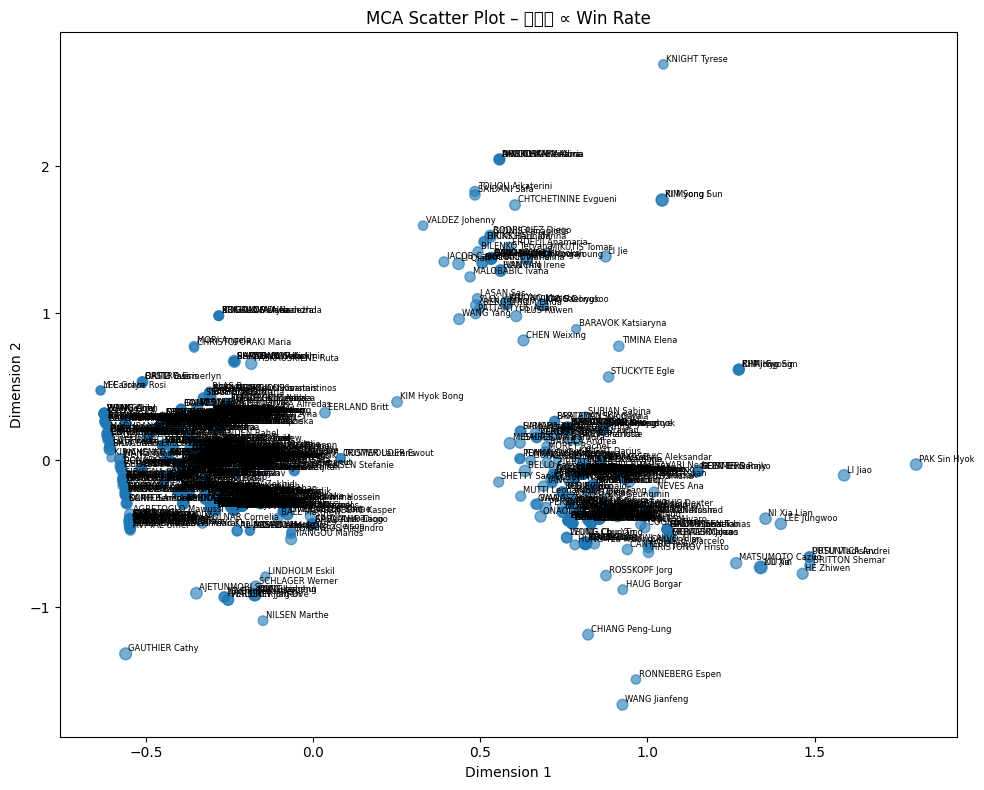

In [64]:
import matplotlib.pyplot as plt

# 假设 result 已经准备好：
# result.columns == [0, 1, 'Player', 'Win Rate']

fig, ax = plt.subplots(figsize=(10, 8))

# 散点：x=第一主成分, y=第二主成分, 大小∝胜率
scatter = ax.scatter(
    result[0],               # 第一主成分
    result[1],               # 第二主成分
    s = result["Win Rate"],  # 点面积映射胜率
    alpha = 0.6
)

# 标注每个点的选手名字
for i, name in enumerate(result["Player"]):
    ax.annotate(
        name,
        (result.iloc[i, 0], result.iloc[i, 1]),
        fontsize=6,
        xytext=(2, 2),
        textcoords='offset points'
    )

# 坐标轴和标题
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("MCA Scatter Plot – 点大小 ∝ Win Rate")

plt.tight_layout()
plt.show()


In [72]:
print([n for n in dir(mca1) if "eigen" in n.lower() or "inertia" in n.lower()])

['_eigenvalues_summary', 'eigenvalues_', 'eigenvalues_summary', 'total_inertia_']


/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/949287622.py:48: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/949287622.py:48: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/949287622.py:48: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/949287622.py:48: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_82358/949287622.py:48: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/6j8bfv1n36l90czq1nym

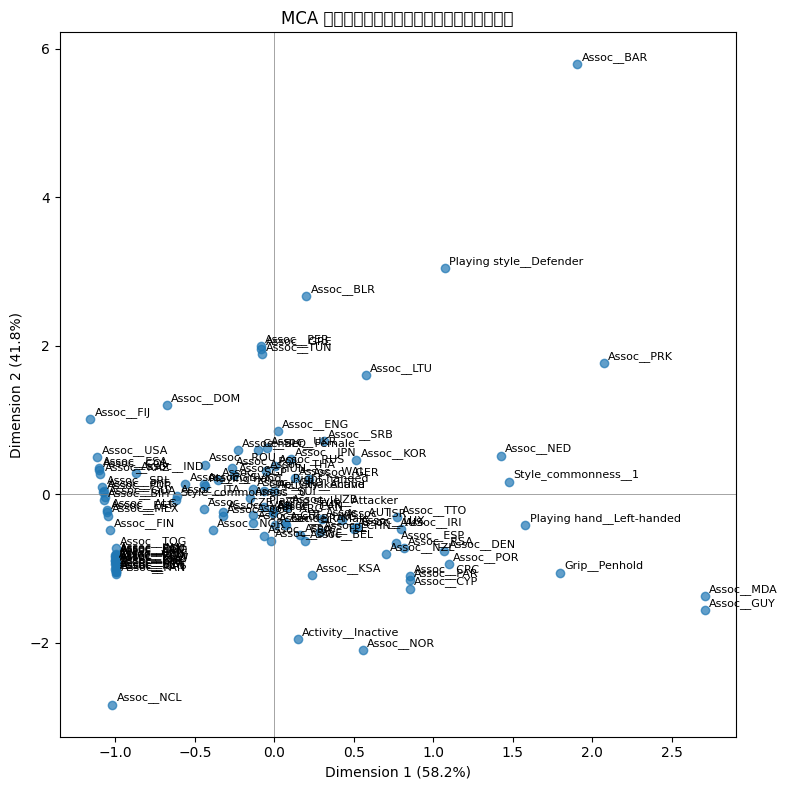

In [73]:
import matplotlib.pyplot as plt
col_coords=mca1.column_coordinates(df_cat)
# 假设 col_coords 已经存在，且是 prince.MCA().column_coordinates 的输出
# col_coords.columns == [0, 1]
# col_coords.index 可能是 Index(['Assoc=CHN', 'Assoc=TPE', ...])
#           或 MultiIndex([('Assoc', 'CHN'), ('Assoc', 'TPE'), ...])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(col_coords[0], col_coords[1], alpha=0.7)

for label, x, y in zip(col_coords.index, col_coords[0], col_coords[1]):
    # 兼容单级或多级索引
    if isinstance(label, tuple):
        # 如果是多级索引，取前两级拼成字符串
        if len(label) >= 2:
            text = f"{label[0]}={label[1]}"
        else:
            text = str(label)
    else:
        # 单级索引直接转字符串
        text = str(label)
    ax.annotate(
        text,
        (x, y),
        fontsize=8,
        xytext=(3, 3),
        textcoords='offset points'
    )

ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)

# 假设你已经 fit 过了 mca1
# 取出它的特征值（各成分的 λ 值）
eig = np.array(mca1.eigenvalues_)    # 长度 == n_components

# 计算解释率：λ_i / ∑λ_j
explained_ratio = eig / eig.sum()

# 转成百分比
dim1_pct = explained_ratio[0] * 100
dim2_pct = explained_ratio[1] * 100

# 然后在画图时就用这两个值
ax.set_xlabel(f"Dimension 1 ({dim1_pct:.1f}%)")
ax.set_ylabel(f"Dimension 2 ({dim2_pct:.1f}%)")
ax.set_title("MCA 变量图：各类别水平在前两主成分上的投影")
plt.tight_layout()
plt.show()
